In [2]:
import scipy.io
# 读取第一个上传的 .mat 文件以检查其内容
emg_features_mat_path = 'C:\\Users\\ly\\Desktop\\SIAT\\SIAT-UPS\\emg_features_examples.mat'
emg_features_data = scipy.io.loadmat(emg_features_mat_path)

# 显示文件中的变量名称，以便了解文件内容
emg_features_data_keys = list(emg_features_data.keys())
emg_features_data_keys

['__header__',
 '__version__',
 '__globals__',
 'examples',
 'num_labels',
 'OneHot_labels',
 'angle_name',
 'angle_labels',
 'torque_name',
 'torque_labels',
 'details_subject',
 'details_movement',
 'details_group',
 'movements_label_list',
 'num_label_list',
 'OneHot_label_list']

In [3]:
# 检查 'angle_name','angle_lables' 变量的形状和内容样本
emg_features_examples_shape = emg_features_data['angle_labels'].shape
emg_features_examples_sample = emg_features_data['angle_labels'][1]  # 显示第一个样本的数据
emg_features_examples_shape1 = emg_features_data['angle_name'].shape
emg_features_examples_sample1 = emg_features_data['angle_name'][1]  # 显示第一个样本的数据

emg_features_examples_shape, emg_features_examples_sample, emg_features_examples_shape1, emg_features_examples_sample1 # (subjects, windows, features)?

((19952, 8),
 array([-3.91603851, 39.97665602, 94.44609182, 10.57427015, -1.63899967,
        25.7184997 , 36.04364928, -0.57513342]),
 (8,),
 'left hip flexion   ')

In [4]:
emg_features_examples_shape = emg_features_data['movements_label_list'].shape
emg_features_examples_sample = emg_features_data['movements_label_list'][0]  # 显示第一个样本的数据
emg_features_examples_shape1 = emg_features_data['details_movement'].shape
emg_features_examples_sample1 = emg_features_data['details_movement'][0]  # 显示第一个样本的数据

emg_features_examples_shape, emg_features_examples_sample, emg_features_examples_shape1, emg_features_examples_sample1

((3,), 'HS-TO ', (19952,), 'DNS')

In [5]:
# 检查 'examples' 变量的形状和内容样本
emg_features_examples_shape = emg_features_data['examples'].shape
emg_features_examples_sample = emg_features_data['examples'][0]  # 显示第一个样本的数据

emg_features_examples_shape, emg_features_examples_sample # (时间戳, 电极数, features)?

((19952, 9, 6),
 array([[4.64151201e-01, 3.25511632e-05, 1.34401219e-01, 1.30000000e+01,
         1.00000000e+00, 9.40000000e+01],
        [1.35453558e-01, 3.34255442e-06, 4.45525921e-02, 1.00000000e+01,
         0.00000000e+00, 8.10000000e+01],
        [6.28960503e-02, 5.75934568e-07, 9.72118049e-03, 4.00000000e+00,
         0.00000000e+00, 1.50000000e+01],
        [1.32103932e-01, 3.12590716e-06, 3.79808012e-02, 1.00000000e+01,
         0.00000000e+00, 8.50000000e+01],
        [3.06580046e-02, 2.05271022e-07, 1.10763917e-02, 2.00000000e+01,
         0.00000000e+00, 4.30000000e+01],
        [7.07835886e-02, 1.79818125e-06, 1.43553284e-02, 3.00000000e+00,
         0.00000000e+00, 4.00000000e+01],
        [2.67798561e-01, 1.19599958e-05, 6.17361664e-02, 8.00000000e+00,
         1.00000000e+00, 8.50000000e+01],
        [7.28941008e-01, 8.23077323e-05, 1.56485397e-01, 5.00000000e+00,
         3.00000000e+00, 9.40000000e+01],
        [2.30993562e-01, 6.90070941e-06, 2.90136388e-02, 4.00000

In [6]:
# 检查 'examples' 和目标变量（'angle_labels' 或 'torque_labels'）的数据结构
examples_shape = emg_features_data['examples'].shape
angle_labels_shape = emg_features_data['angle_labels'].shape if 'angle_labels' in emg_features_data else None
torque_labels_shape = emg_features_data['torque_labels'].shape if 'torque_labels' in emg_features_data else None

examples_shape, angle_labels_shape, torque_labels_shape


((19952, 9, 6), (19952, 8), (19952, 8))

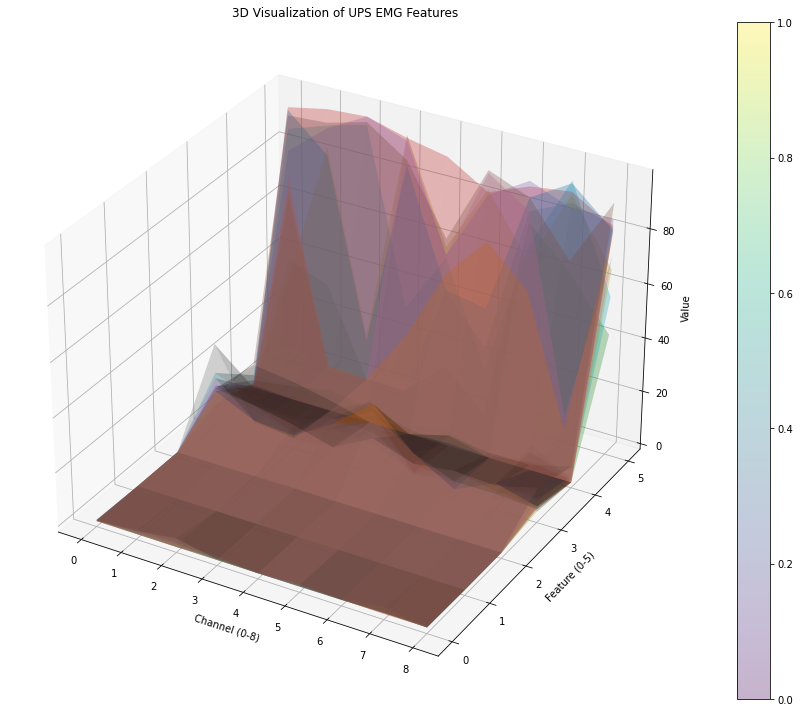

In [17]:
# 在已有代码后添加
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

datattt = emg_features_data['examples']
plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

# 选择要显示的时间点范围(为了可视化效果更好，我们可以选择一个较小的范围)
time_points = slice(0, 1000)  # 选择前100个时间点
# 创建网格
X, Y = np.meshgrid(range(9), range(6))

# 对于选定的时间点，绘制3D表面
for t in range(0, 100, 10):  # 每隔10个时间点绘制一次
    Z = datattt[t]
    surf = ax.plot_surface(X, Y, Z.T, alpha=0.3)

# 设置坐标轴标签
ax.set_xlabel('Channel (0-8)')
ax.set_ylabel('Feature (0-5)')
ax.set_zlabel('Value')

# 设置标题
plt.title('3D Visualization of UPS EMG Features')

# 添加颜色条
plt.colorbar(surf)

plt.tight_layout()
plt.savefig('UPS-GSPR-3D.png')
plt.show()

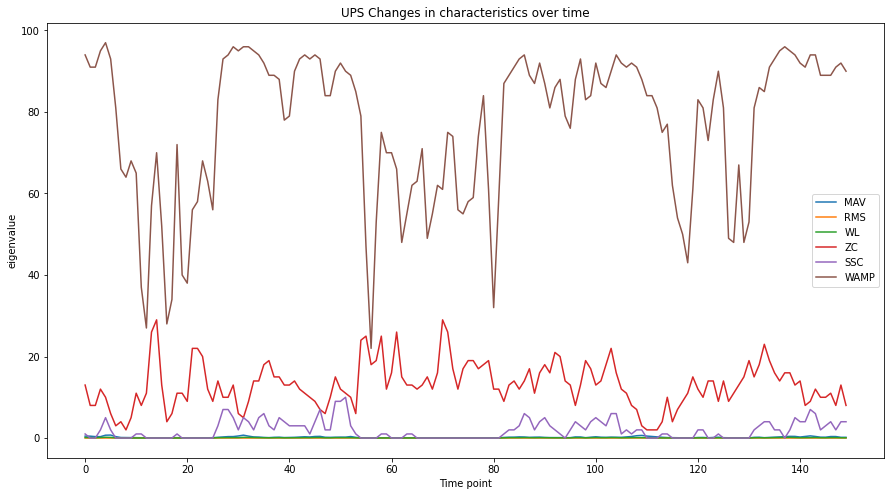

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# 分析特征随时间的变化
plt.figure(figsize=(15, 8))
channel = 0  # 选择第一个通道
for i in range(6):
    plt.plot(data[0:150, channel, i], label=feature_names[i])

plt.title(f'UPS Changes in characteristics over time')
plt.xlabel('Time point')
plt.ylabel('eigenvalue')
plt.legend()
plt.savefig('UPS-GSPR-time-series.png', dpi=300)
plt.show()

C:\Users\ly\AppData\Local\Temp\ipykernel_1656\138044063.py:21: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from current font.
  plt.savefig('DNS-GSPR-pca.png', dpi=300)
C:\Users\ly\AppData\Local\Temp\ipykernel_1656\138044063.py:21: UserWarning: Glyph 37322 (\N{CJK UNIFIED IDEOGRAPH-91CA}) missing from current font.
  plt.savefig('DNS-GSPR-pca.png', dpi=300)
C:\Users\ly\AppData\Local\Temp\ipykernel_1656\138044063.py:21: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  plt.savefig('DNS-GSPR-pca.png', dpi=300)
C:\Users\ly\AppData\Local\Temp\ipykernel_1656\138044063.py:21: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  plt.savefig('DNS-GSPR-pca.png', dpi=300)
C:\Users\ly\AppData\Local\Temp\ipykernel_1656\138044063.py:21: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  plt.savefig('DNS-GSPR-pca.png', dpi=300)
C:\Users\ly\AppData\Local\Temp\ipykernel_1656

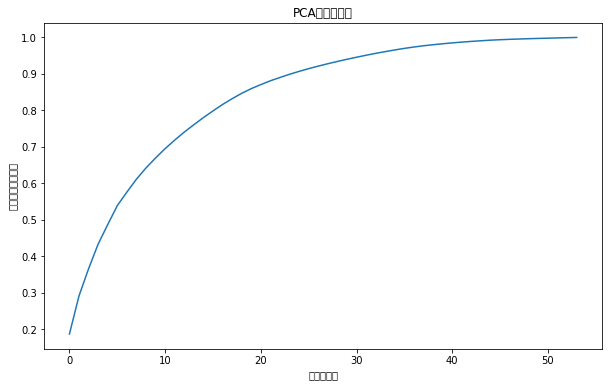

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 重塑数据
X = data.reshape(data.shape[0], -1)  # 将3D数据转换为2D

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 执行PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 绘制解释方差比
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('主成分数量')
plt.ylabel('解释方差比累计和')
plt.title('PCA解释方差比')
plt.savefig('DNS-GSPR-pca.png', dpi=300)
plt.show()

In [6]:
import numpy as np
from sklearnex import patch_sklearn, config_context
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [7]:
import numpy as np
import scipy.io

emg_features_mat_path = 'D:\\ly\\sEMG\\SIAT-UPS\\emg_features_examples.mat'
emg_features_data = scipy.io.loadmat(emg_features_mat_path)

sEMG_data = emg_features_data['examples']
angles = emg_features_data['angle_labels']
torques = emg_features_data['torque_labels']

sEMG = sEMG_data.reshape(sEMG_data.shape[0], -1)
print(sEMG_data.shape, sEMG.shape, angles.shape, torques.shape)

(19952, 9, 6) (19952, 54) (19952, 8) (19952, 8)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_angles_train, y_angles_test, y_torques_train, y_torques_test = train_test_split(
    sEMG, angles, torques, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_angles_train.shape, y_angles_test.shape, y_torques_train.shape, y_torques_test.shape)

(15961, 54) (3991, 54) (15961, 8) (3991, 8) (15961, 8) (3991, 8)


In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
    
with config_context(target_offload="gpu:0"):
    # 定义高斯过程回归模型的核函数
    kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

    # 为角度和扭矩分别创建高斯过程回归模型
    gp_angles = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp_torques = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    # 训练模型
    gp_angles.fit(X_train, y_angles_train)
    gp_torques.fit(X_train, y_torques_train)    

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# 进行预测
y_angles_pred = gp_angles.predict(X_test)
y_torques_pred = gp_torques.predict(X_test)

mae_angles = mean_absolute_error(y_angles_test, y_angles_pred)
mae_torques = mean_absolute_error(y_torques_test, y_torques_pred)
# 计算并输出均方误差
rmse_angles = np.sqrt(mean_squared_error(y_angles_test, y_angles_pred))
rmse_torques = np.sqrt(mean_squared_error(y_torques_test, y_torques_pred))

print(f"Angle MAE: {mae_angles}, RMSE: {rmse_angles}")
print(f"Torque MAE: {mae_torques}, RMSE: {rmse_torques}")

Angle MAE: 7.541229250524231, RMSE: 12.280087123822993
Torque MAE: 10.952096986863001, RMSE: 16.21753080201372


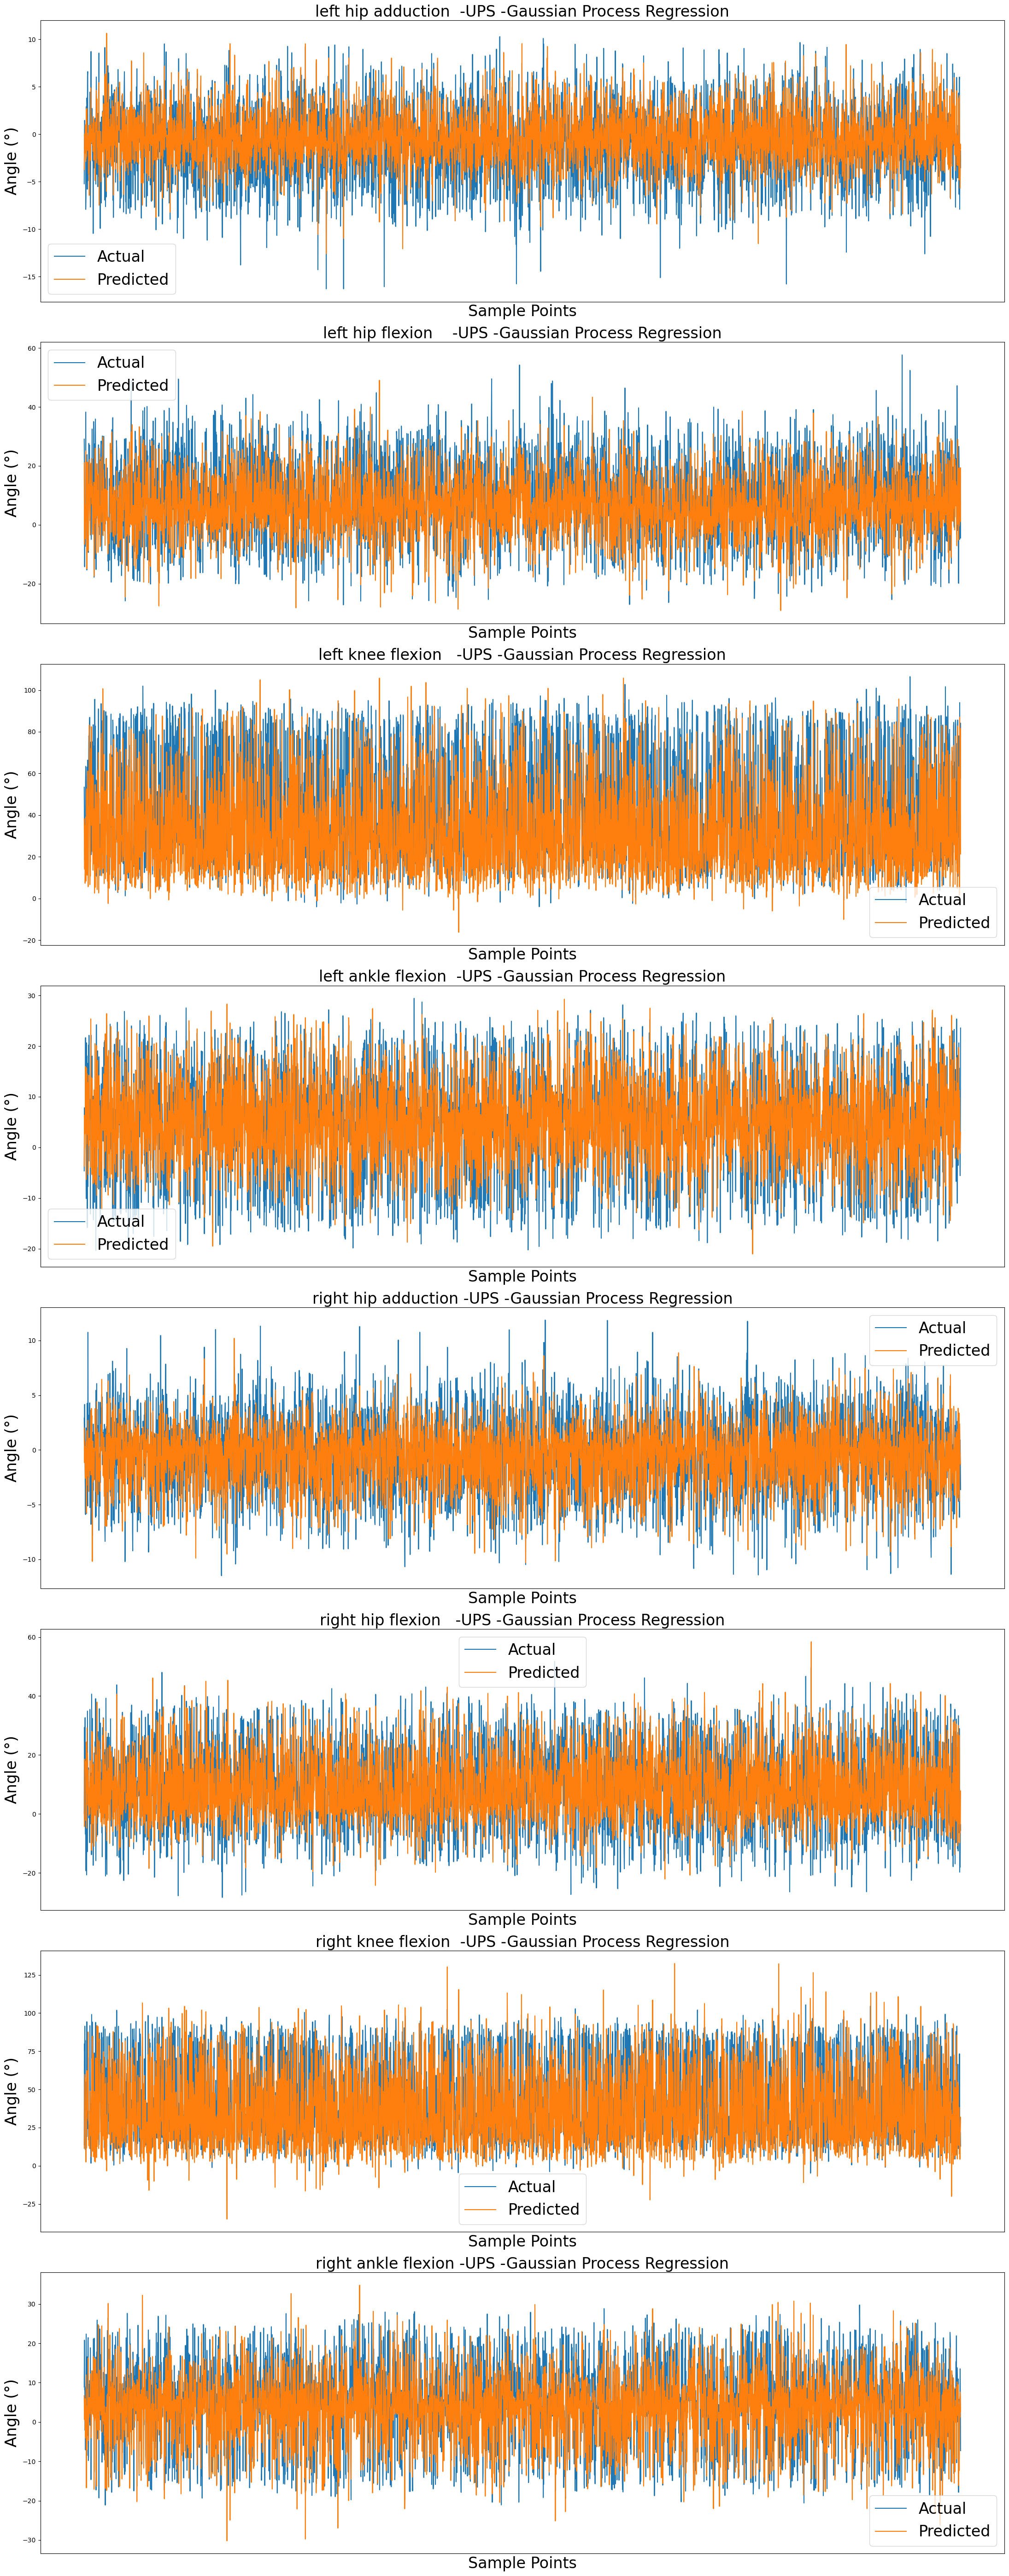

In [13]:
import matplotlib.pyplot as plt
angle_name_list = emg_features_data['angle_name']
index = 0
# 绘制角度预测与实际值的对比曲线
plt.figure(figsize=(22, 56))

# 绘制每个角度的预测与实际值
for i in range(y_angles_test.shape[1]):
    plt.subplot(8, 1, i + 1, xticks=[], xticklabels=[])
    plt.plot(y_angles_test[:, i], label='Actual')
    plt.plot(y_angles_pred[:, i], label='Predicted')
    plt.title(f'{angle_name_list[index]} -UPS -Gaussian Process Regression', fontsize=24)
    index += 1
    plt.xlabel('Sample Points', fontsize=24)
    plt.ylabel('Angle (°)', fontsize=24)
    plt.legend(fontsize=24)
    

plt.tight_layout()
plt.savefig('UPS-GSPR-angle.png', dpi=64)
plt.show()



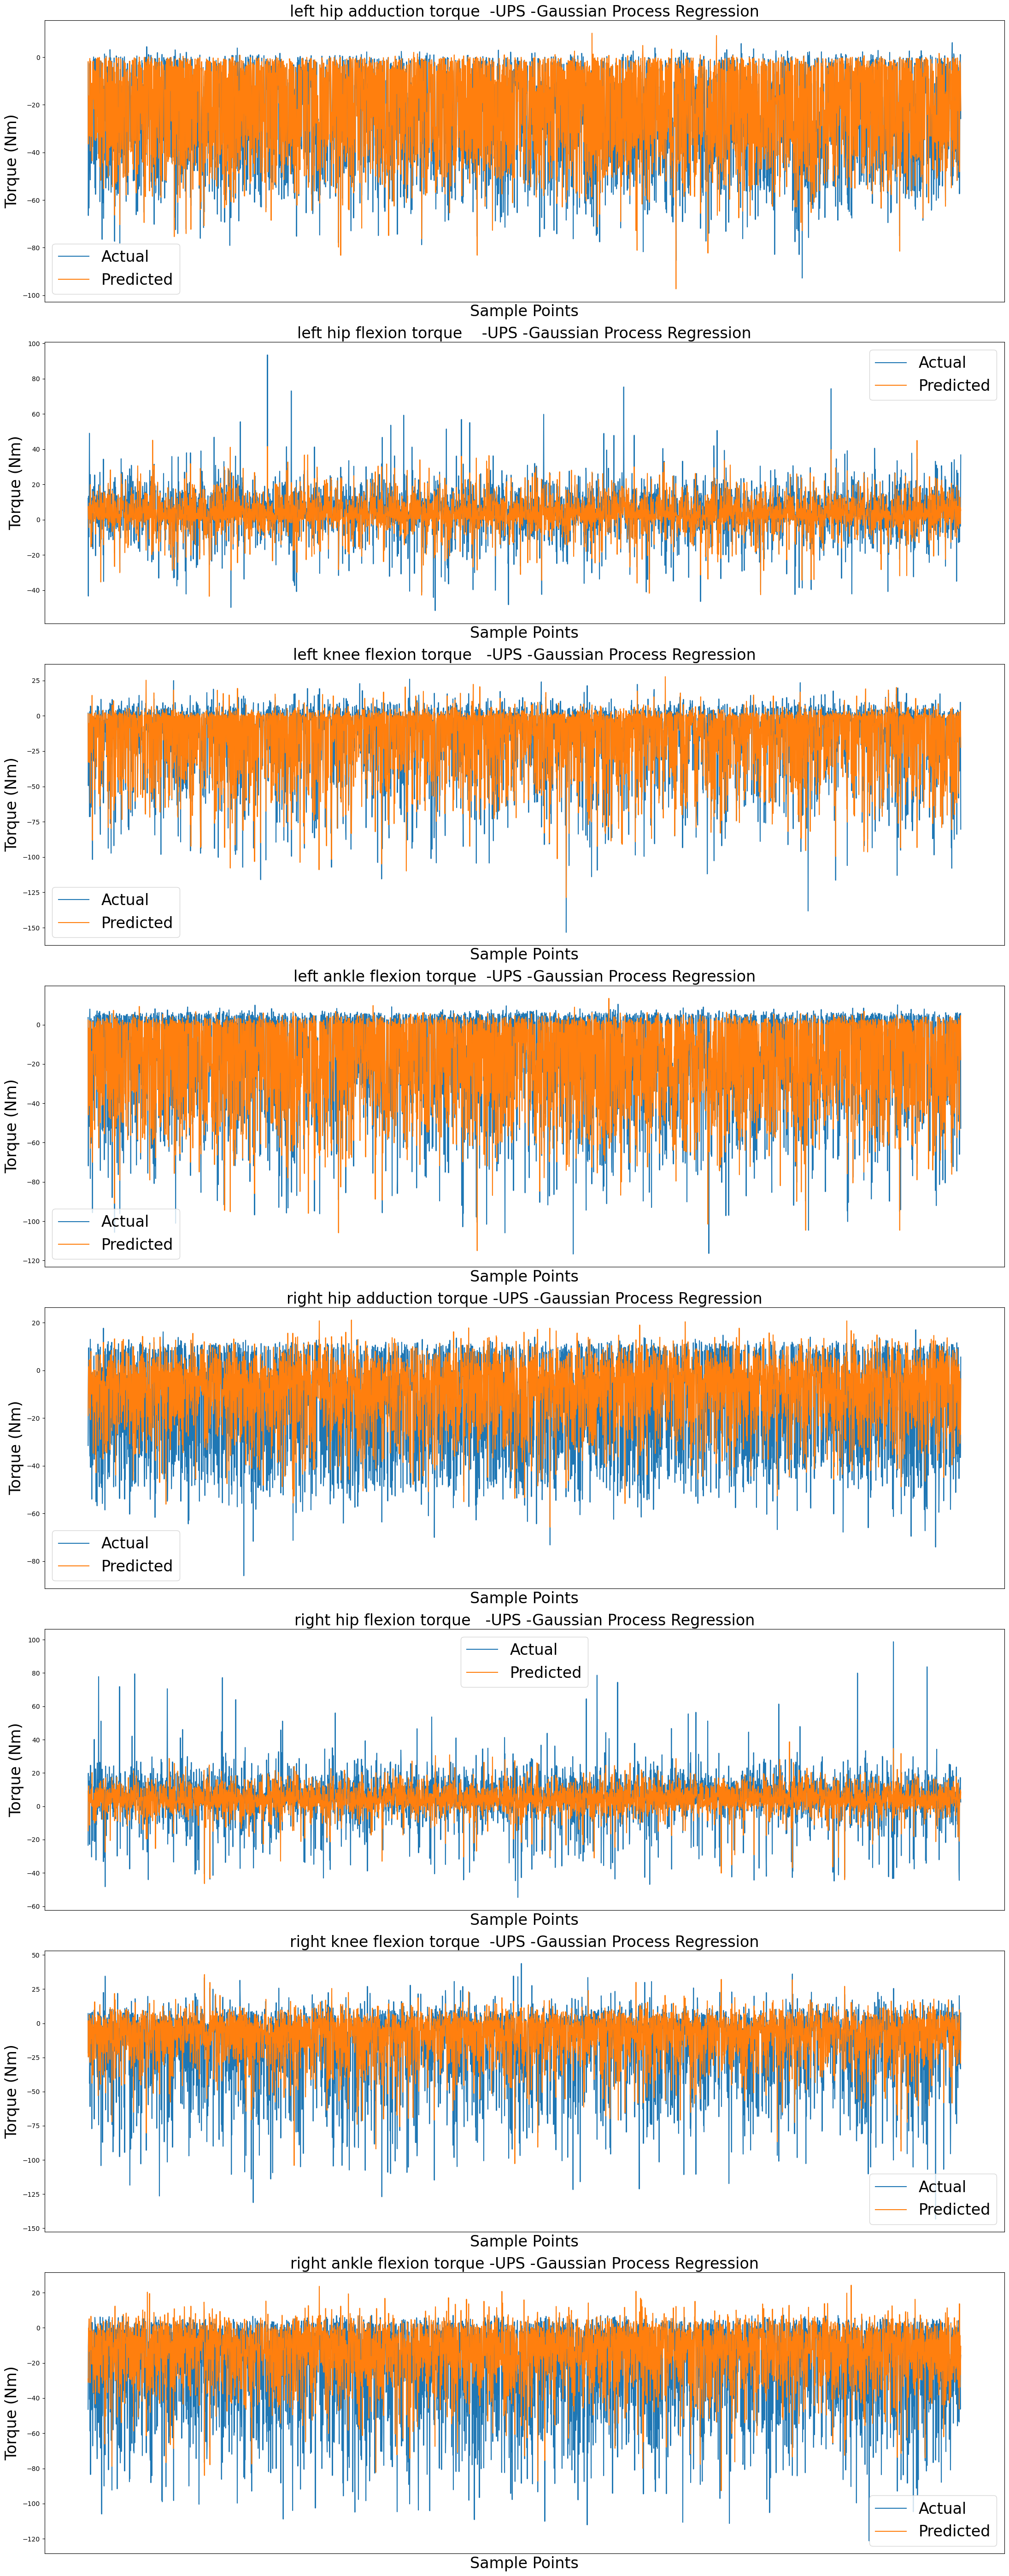

In [14]:
tor_name_list = emg_features_data['torque_name']

index = 0
# 绘制角度预测与实际值的对比曲线
plt.figure(figsize=(22, 56))

# 绘制每个角度的预测与实际值
for i in range(y_torques_test.shape[1]):
    plt.subplot(8, 1, i + 1, xticks=[], xticklabels=[])
    plt.plot(y_torques_test[:, i], label='Actual')
    plt.plot(y_torques_pred[:, i], label='Predicted')
    plt.title(f'{tor_name_list[index]} -UPS -Gaussian Process Regression', fontsize=24)
    index += 1
    plt.xlabel('Sample Points', fontsize=24)
    plt.ylabel('Torque (Nm)', fontsize=24)
    plt.legend(fontsize=24)
    

plt.tight_layout()
plt.savefig('UPS-GSPR-torque.png', dpi=64)
plt.show()